# Τεχνικές Εξόρυξης Δεδομένων - 1η Άσκηση
Φοιτητές: Καμμάς Ζήσης : sdi2000290,
          Φωτόπουλος Δημήτριος : sdi2000292

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# Load Data 
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Question 1

Με την μέθοδο isna() βρίσκουμε σε ποιες στήλες υπάρχουν κενά δεδομένα και προσθέτοντάς τα βλέπουμε ότι η στήλη Income έχει 24 εγγραφές χωρίς τιμή.

In [5]:
# Find which columns have missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Οι εγγραφές αυτές είναι πολύ λίγες σε σχέση με ολόκληρη την βάση οπότε τις αφαιρούμε.

In [6]:
# Drop missing values
data = data.dropna()

In [7]:
# Convert to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)


<ipython-input-7-43c9510464f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)


Με την μέθοδο dtypes παρατηρούμε ότι υπάρχουν 2 χαρακτηριστικά τύπου object. (Marital_Status, Education)

In [8]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

# Question 2

In [9]:
print("Marital_Status:", data['Marital_Status'].unique())
print("Ecucation:", data['Education'].unique())

Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Ecucation: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [10]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
print("New Marital_Status indexes: ", data["Marital_Status"].unique())

New Marital_Status indexes:  ['Single' 'Together' 'Married' 'Divorced' 'Widow']


Χρησιμοποιώντας την groupby μετράμε το πλήθος των πελατών σε κάθε κατηγορία και δημιουργούμε το γράφημα

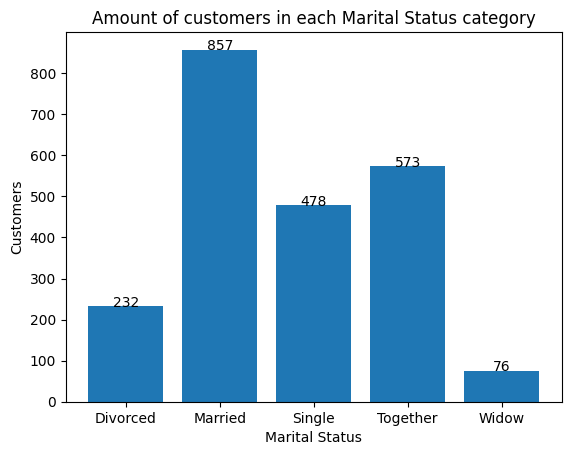

In [11]:
marital_status = data.groupby('Marital_Status').count()['ID']

plt.bar(marital_status.index, marital_status.values)
plt.xlabel("Marital Status")
plt.ylabel("Customers")
plt.title("Amount of customers in each Marital Status category")

# Προσθήκη των τιμών πάνω από κάθε μπάρα
for index, value in enumerate(marital_status.values):
  plt.text(index, value, str(value), horizontalalignment = "center")


# Question 3

Χρησιμοποιώντας την σημερινή ημερομηνία **(`pd.Timestamp.today()`)** και τη στήλη Recency βρίσκουμε την ημέρα που ο πελάτης έκανε την τελευταία του αγορά, και από αυτή αφαιρούμε την ημερομηνία που ο πελάτης έκανε την πρώτη αγορά. Η πράξη αυτή πρέπει να εφαρμοστή σε κάθε εγγραφή με την **`data.apply()`**

In [12]:
# A
data['Customer_For'] = data.apply(lambda row: ((pd.Timestamp.today() - pd.Timedelta(days=row['Recency'])) - pd.Timestamp(row['Dt_Customer'])).days, axis=1)
data["Customer_For"]

0       3831
1       3301
2       3512
3       3339
4       3293
        ... 
2235    3561
2236    3189
2237    3290
2238    3374
2239    3808
Name: Customer_For, Length: 2216, dtype: int64

In [13]:
# B
data['Age'] = 2023 - data['Year_Birth'] 

Με την `data.filter` βρίσκουμε τα columns όπου στην ονομασία υπάρχει το 'Mnt' και τα προσθέτουμε για να βγει το συνολικό ποσό που ξόδεψε ο πελάτης

In [14]:
# C
data['Spent'] = data.filter(regex='Mnt').sum(axis=1)

In [15]:
# D
data['Kids'] = data['Kidhome'] + data['Teenhome']

Με την `np.where()` ελέγχουμε την συνθήκη 'Εαν το Marital_Status είναι Together ή Married '. Στις περιπτώσεις που αληθεύει τοποθετείται η τιμή 'Partner', ενώ στις υπόλοιπες (Divorced, Single, Widow) τοποθετείται η τιμή 'Alone'.

In [16]:
# Z
data['Living_With'] = np.where(data['Marital_Status'].isin(['Together', 'Married']), 'Partner', 'Alone')
data[['Marital_Status','Living_With']]

,Marital_Status,Living_With
0,Single,Alone
1,Single,Alone
2,Together,Partner
3,Together,Partner
4,Married,Partner
...,...,...
2235,Married,Partner
2236,Together,Partner
2237,Divorced,Alone
2238,Together,Partner


Χρησιμοποιώντας μια βοηθητική στήλη AdultsInHouse και την στήλη Kids έχουμε τον συνολικό αριθμό των μελών μιας οικογένειας

In [17]:
# E
data['AdultsInHouse'] = np.where(data['Living_With'] == 'Alone', 1, 2)
data['Family_Size'] = data['Kids'] + data['AdultsInHouse']

# AdultsInHouse is not needed anymore 
data = data.drop(columns=['AdultsInHouse'])

data[['Living_With', 'Kids', 'Family_Size']]

,Living_With,Kids,Family_Size
0,Alone,0,1
1,Alone,2,3
2,Partner,0,2
3,Partner,1,3
4,Partner,1,3
...,...,...,...
2235,Partner,1,3
2236,Partner,3,5
2237,Alone,0,1
2238,Partner,1,3


Πολλαπλασιάζοντας με το 1 μια boolean τιμή μετατρέπεται σε 0 ή 1 

In [18]:
# ST
data['Is_Parent'] = (data['Kids'] > 0) * 1
data[['Kids','Is_Parent']]

,Kids,Is_Parent
0,0,0
1,2,1
2,0,0
3,1,1
4,1,1
...,...,...
2235,1,1
2236,3,1
2237,0,0
2238,1,1


Με την μέθοδο `pd.cut()` δημιουργούμε τους "κάδους" (bins), και τα ονόματα (labels) για τον κάθε κάδο

In [19]:
# H
data['Age_Group'] = pd.cut(data['Age'], bins = [20,30,40,50,60,70,80, np.inf], labels =["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"])
data[['Age','Age_Group']].head(15)

,Age,Age_Group
0,66,61-70
1,69,61-70
2,58,51-60
3,39,31-40
4,42,41-50
5,56,51-60
6,52,51-60
7,38,31-40
8,49,41-50
9,73,71-80


# Question 4

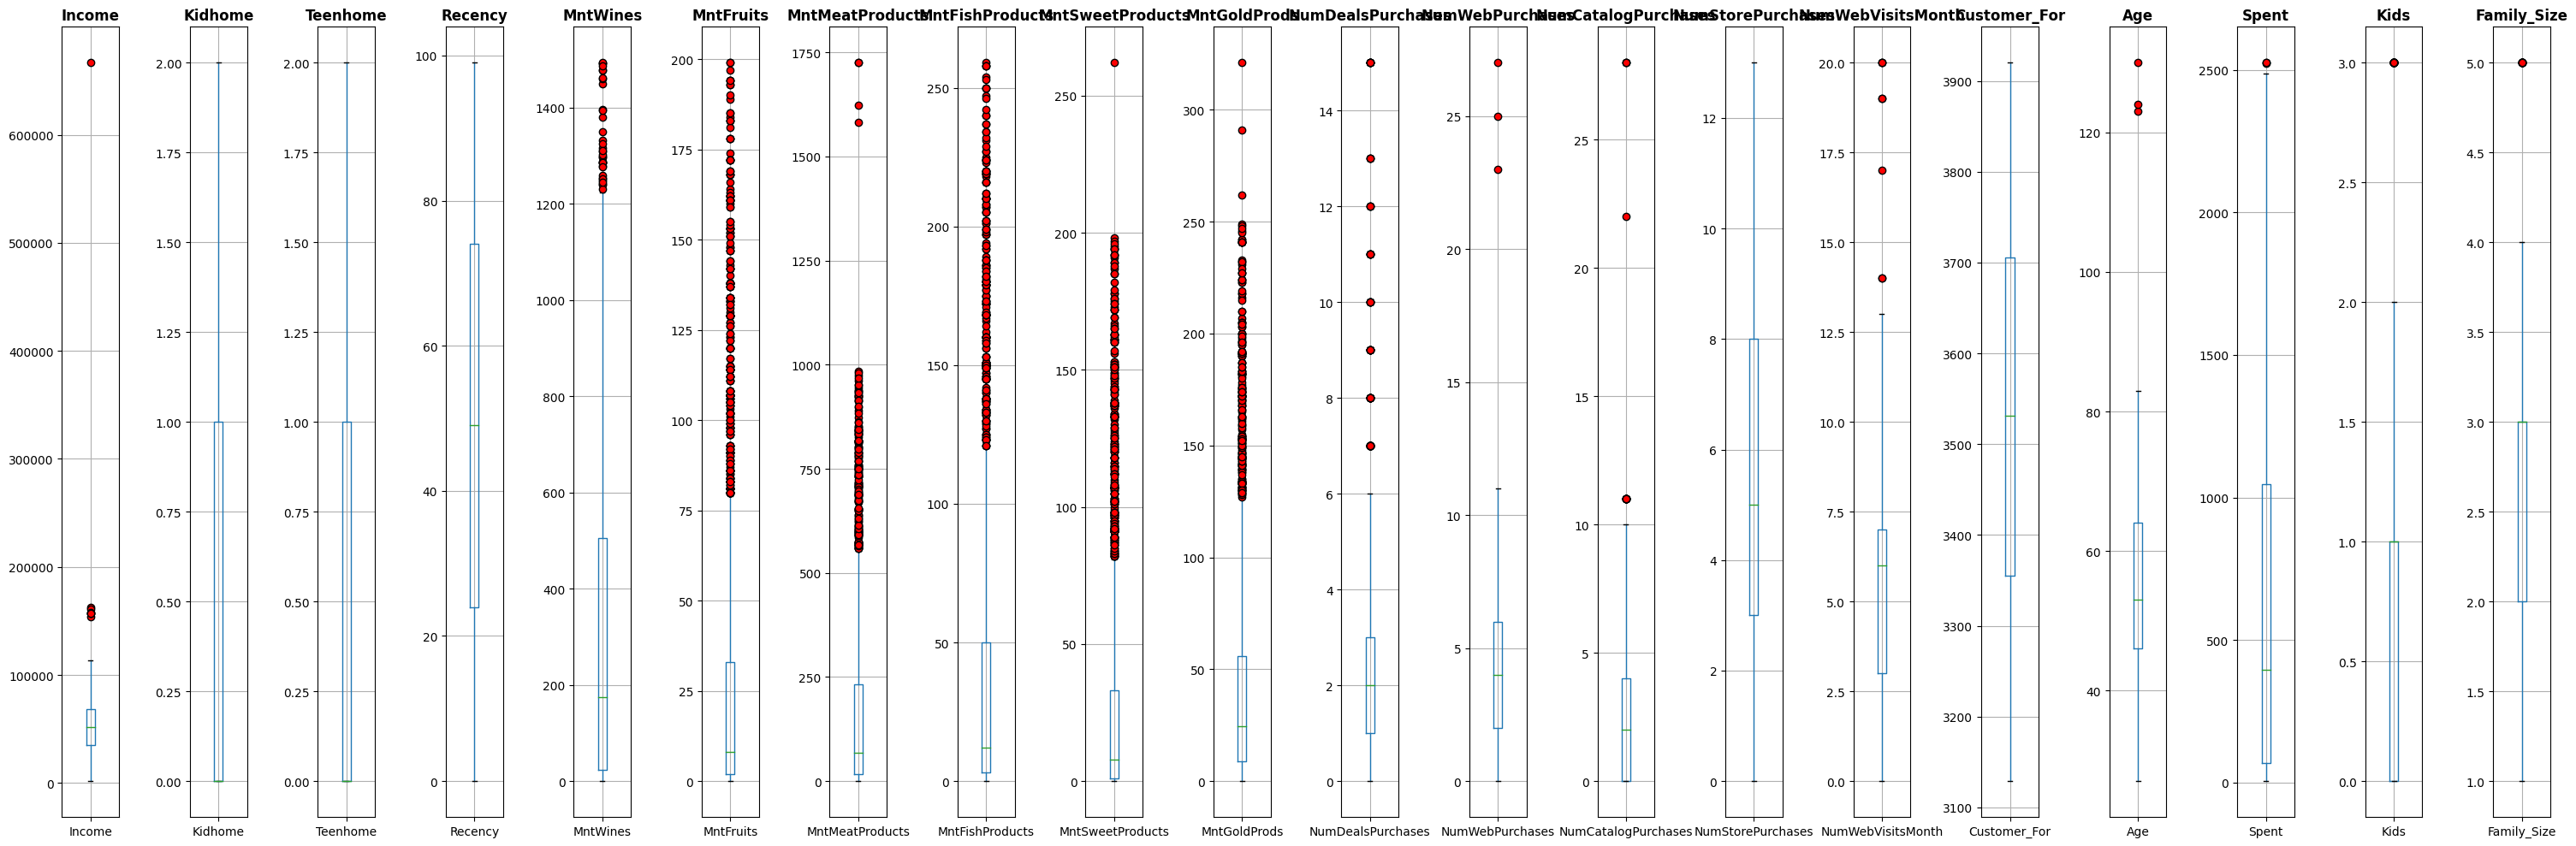

In [21]:
#Δημιουργία μιας λίστας με τα αριθμητικά χαρακτηριστικά στα οποία μπορεί να υπάρχουν ακραίες τιμές
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_For',
                      'Age', 'Spent', 'Kids', 'Family_Size']


#Κατασκευή πολλών boxplots σε ένα 
fig, axs = plt.subplots(1, len(numerical_features), figsize=(30,10))
outliers=dict(markerfacecolor='red', marker='o')

for i, col in enumerate(numerical_features):
  data[[col]].boxplot(ax=axs[i], flierprops=outliers)
  axs[i].set_title(col, fontweight='bold')


fig.tight_layout()
plt.show()


Παρατηρούμε τα παρακάτω:


---


1.   Στην στήλη 'Income' υπάρχουν πελάτες με πολύ μεγαλύτερα εισοδήματα από τους υπόλοιπους.
2.   Στην στήλη 'Age' υπάρχουν πελάτες που η καταγεγραμμένη ηλικία τους είναι πάνω από 100 έτη.


---




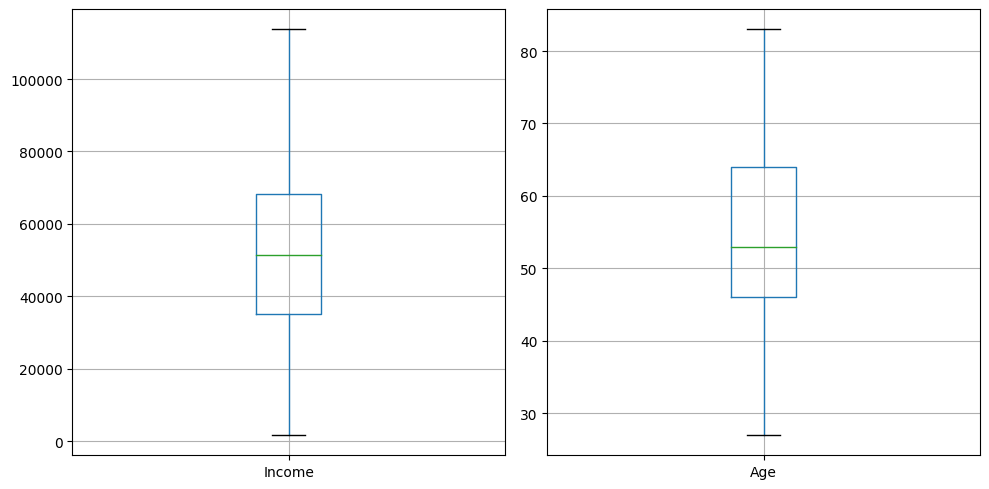

In [22]:
# Αφαίρεση των ακραίων τιμών
data = data[data['Income'] <= 130000]
data = data[data['Age'] < 100]

# Εμφάνιση των νέων boxplots
new_data = ['Income','Age']

fig, axs = plt.subplots(1, len(new_data), figsize=(10,5))
outliers=dict(markerfacecolor='red', marker='o')

for i, col in enumerate(new_data):
  data[[col]].boxplot(ax=axs[i], flierprops=outliers)

fig.tight_layout()
plt.show()

# Question 5

In [23]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Kids,Family_Size,Is_Parent
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,...,0.009070,3.0,11.0,0.15102,3530.709297,54.095692,606.821769,0.948753,2.593651,0.715193
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,...,0.094827,0.0,0.0,0.35815,203.806128,11.705801,601.675284,0.749231,0.906197,0.451425
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.00000,3129.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.0,11.0,0.00000,3355.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,...,0.000000,3.0,11.0,0.00000,3531.000000,53.000000,397.000000,1.000000,3.000000,1.000000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,...,0.000000,3.0,11.0,0.00000,3707.000000,64.000000,1047.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,3.0,11.0,1.00000,3920.000000,83.000000,2525.000000,3.000000,5.000000,1.000000


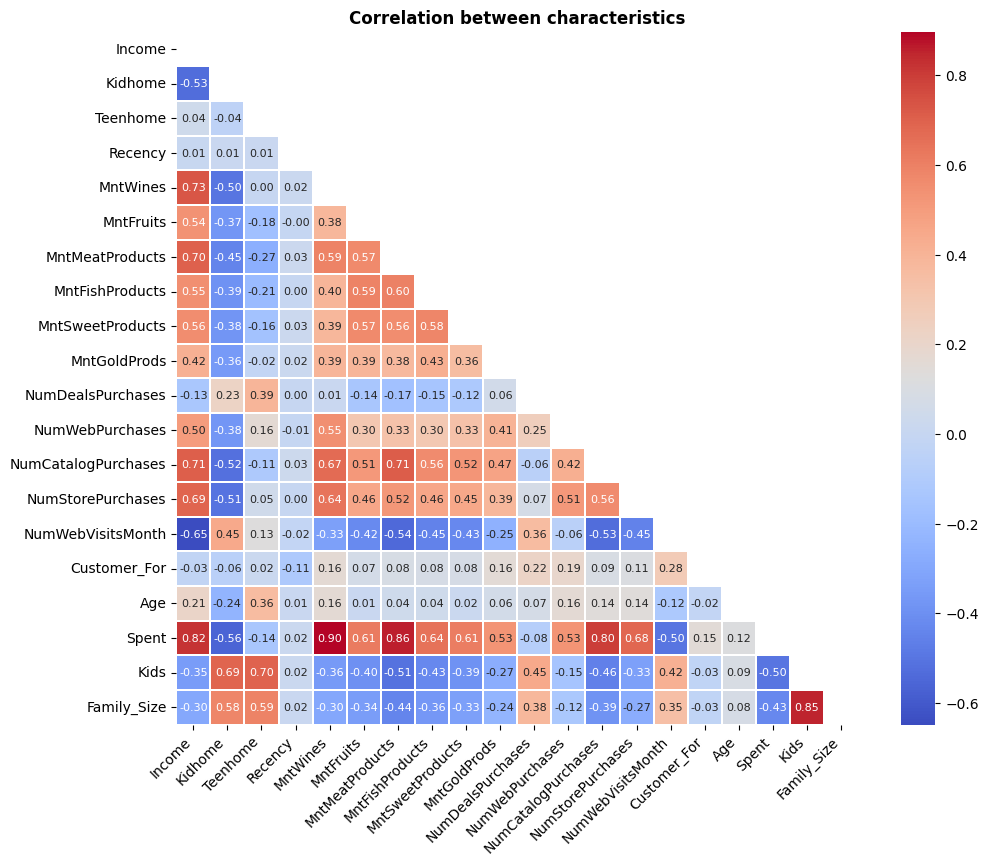

In [24]:
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(data[numerical_features].corr()))
ax = sns.heatmap(data[numerical_features].corr(), linewidth=0.3, cmap='coolwarm', mask = mask, annot=True, annot_kws={'fontsize': 8}, fmt='0.2f')
plt.title('Correlation between characteristics', fontweight='bold')
plt.xticks(ha='right',rotation=45)
plt.show()

# Question 6 

## 1. (6.1) Σε ποια κατηγορία Marital_Status ανήκει το μεγαλύτερο ποσοστό της εταιρείας.

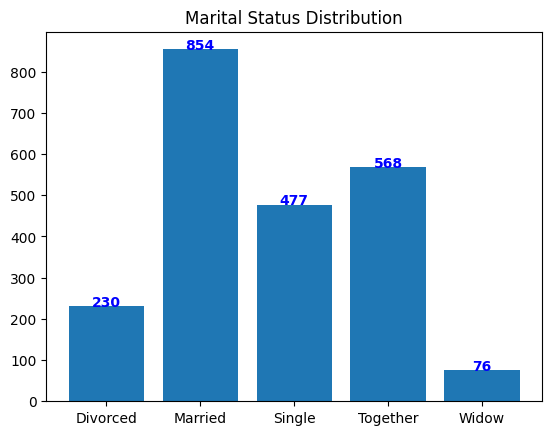

In [25]:
marital_status = data.groupby('Marital_Status').count()['ID']
ax = plt.subplot()
plt.bar(marital_status.index, marital_status.values)
plt.title('Marital Status Distribution')

for i, value in enumerate(marital_status.values):
  plt.text(i, value, str(value), color='blue', horizontalalignment='center',fontweight='bold')
plt.show()

## 2. (6.2) Πόσοι πελάτες έχουν κάνει complain?

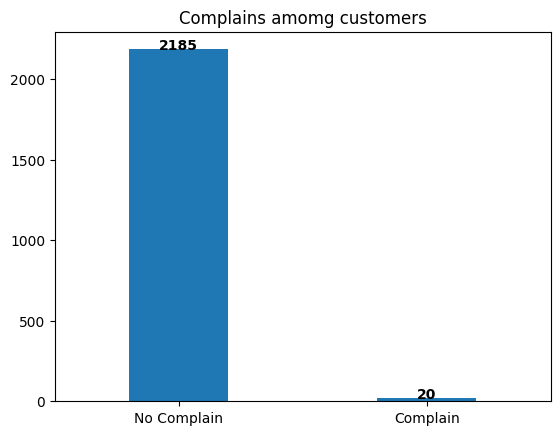

In [26]:
complain = data.groupby('Complain').count()['ID']

plt.bar(complain.index, complain.values, width = 0.4)
plt.title('Complains amomg customers')
plt.xticks((0,1),('No Complain','Complain'))

plt.xlim([-0.5, 1.5])

for index, value in enumerate(complain.values):
    plt.text(index, value, str(value), horizontalalignment='center',fontweight='bold')

plt.show()

## 3. (6.3) Η σχέση μεταξύ του αριθμού των αγορών **Spent** και της οικογενειακής κατάστασης. Αθροίζουμε το ποσό των αγορών **'Spent'** που έχει κάνει η κάθε κατηγορία οικογενειακής κατάστασης.

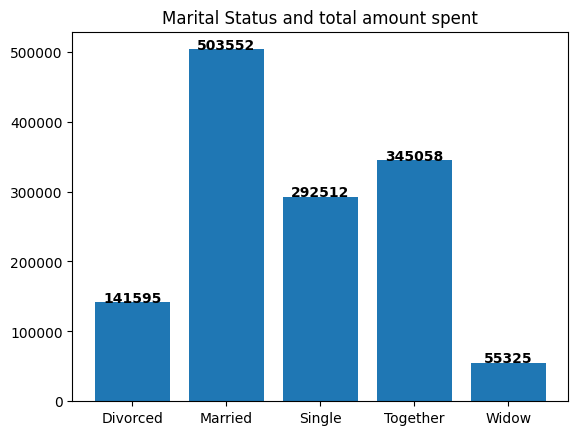

In [27]:
Family_Size_total_spent = data.groupby('Marital_Status')['Spent'].sum()

plt.bar(Family_Size_total_spent.index, Family_Size_total_spent.values)
plt.title('Marital Status and total amount spent')

for index, value in enumerate(Family_Size_total_spent.values):
    plt.text(index, value, str(value), horizontalalignment='center',fontweight='bold')
plt.show()

## 4. (6.6) Η σχέση μεταξύ του εισοδήματος 'Income' και του συνόλου των αγορών 'Spent'.

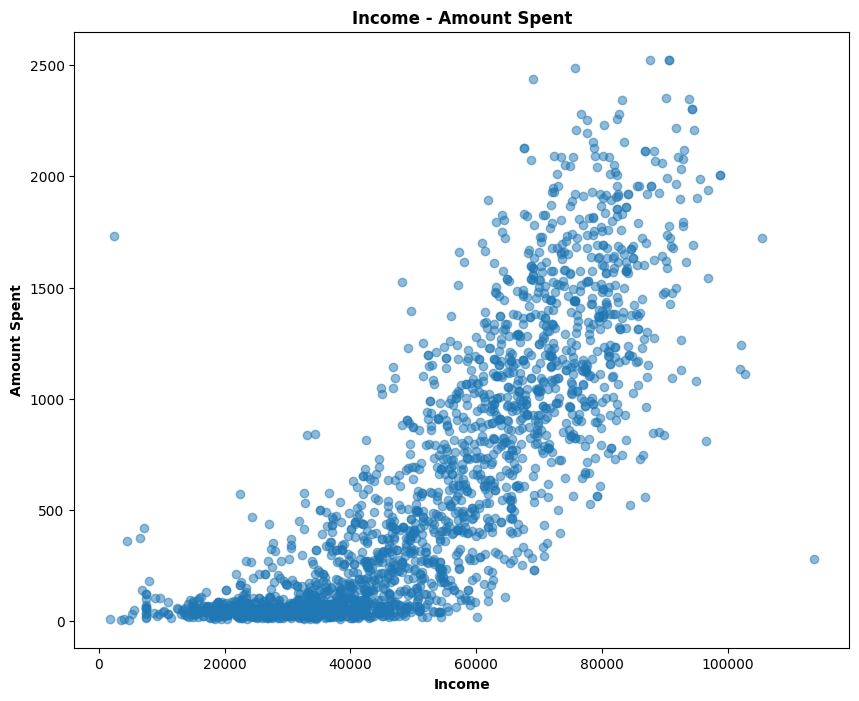

In [28]:
# Create the scatter
plt.figure(figsize=(10,8))
plt.scatter(data['Income'], data['Spent'], alpha=0.5, label='data')
plt.title('Income - Amount Spent', weight='bold')
plt.ylabel('Amount Spent', weight='bold')
plt.xlabel('Income', weight='bold')
plt.show()

## 5. (6.7) Σχέση μεταξύ του εισοδήματος και της εκπαίδευσης

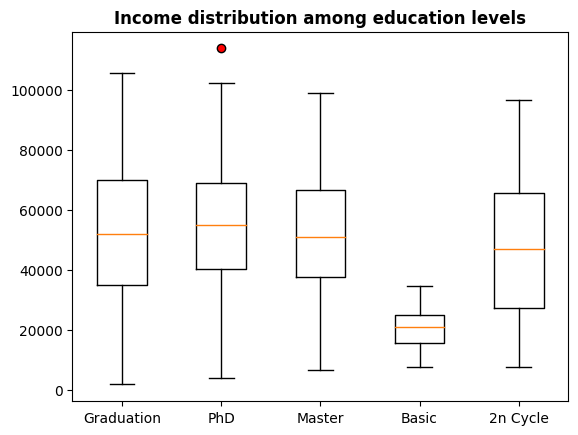

In [29]:
grouped_by_education = data.groupby('Education')

my_dict = {}

for education_level in data['Education'].unique():
  filtered_data = data[data['Education'] == education_level]
  my_dict[education_level] = filtered_data['Income']

outliers=dict(markerfacecolor='red', marker='o')

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), flierprops=outliers)
ax.set_xticklabels(my_dict.keys())
ax.set_title('Income distribution among education levels', weight='bold')

plt.show()

## 6. (6.8) Η σχέση μεταξύ του εισοδήματος και του μεγέθους της οικογένειας



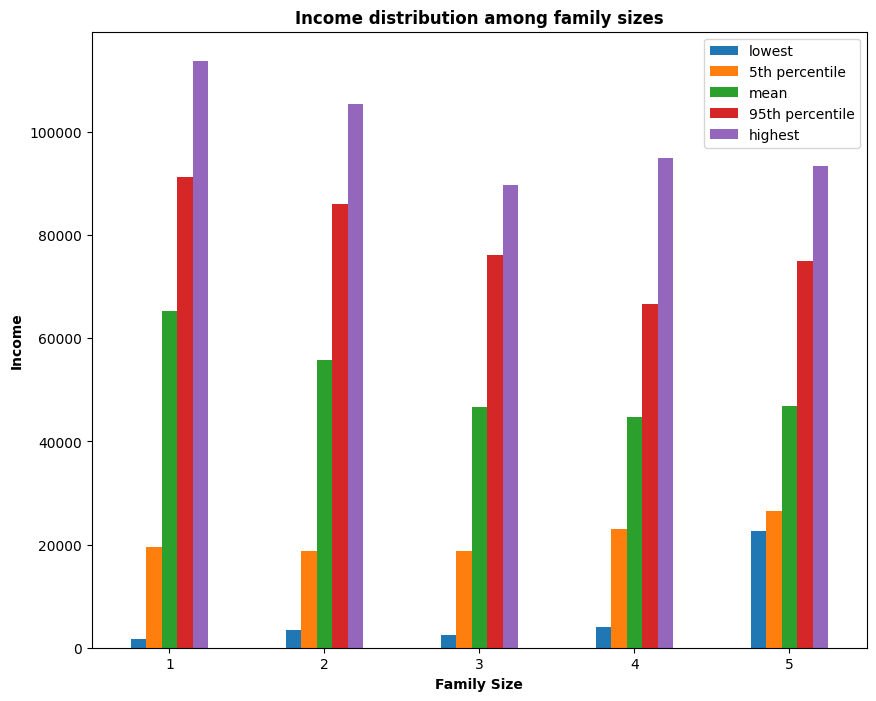

In [30]:
new_df = data.groupby('Family_Size')['Income'].agg(['min', lambda x: x.quantile(0.05),'mean', lambda x: x.quantile(0.95),'max'])


new_df.plot(kind='bar', figsize=(10, 8), rot=0)
plt.title('Income distribution among family sizes', weight='bold')
plt.xlabel('Family Size', weight='bold')
plt.ylabel('Income', weight='bold')
plt.legend(['lowest','5th percentile','mean','95th percentile','highest'])
plt.show()

## 7. (6.14) Σχεδιάστε το ιστόγραμμα για την στήλη NumDealsPurchases

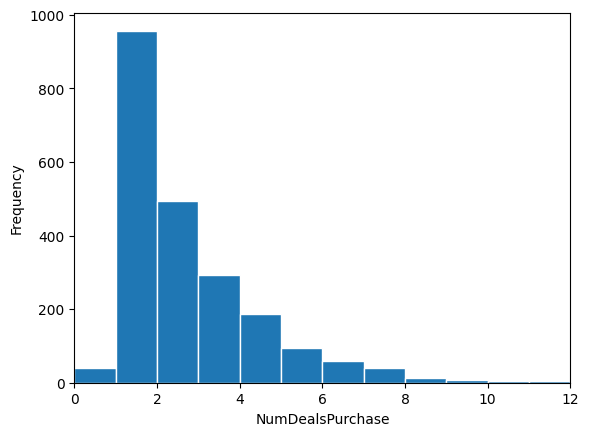

In [31]:

data['NumDealsPurchases'].plot(kind='hist', bins=15, edgecolor='white')
plt.xlabel('NumDealsPurchase')
plt.ylabel('Frequency')
plt.xlim(0,12)

plt.show()

## 8. (6.15) Σχεδιάστε το ιστόγραμμα για την στήλη Income.

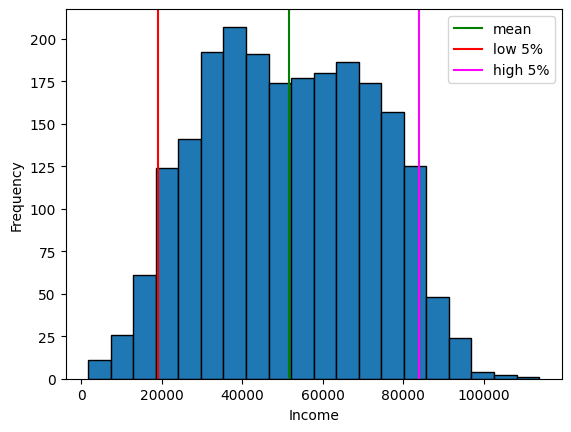

In [32]:
plt.hist(data['Income'], bins=20, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')

mean = data['Income'].mean()
low5 = data['Income'].quantile(0.05)
high5 = data['Income'].quantile(0.95)

plt.axvline(mean, color='green', label='mean')
plt.axvline(low5, color='red', label='low 5%')
plt.axvline(high5, color='magenta', label='high 5%')

plt.legend()
plt.show()

## 9. (6.17) Σχεδιάστε το ιστόγραμμα για την στήλη Family_Size

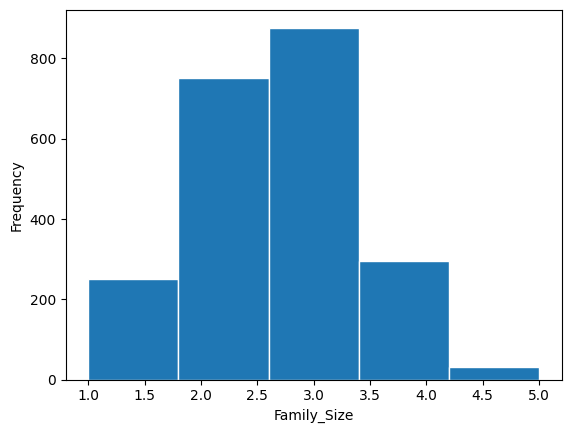

In [33]:
plt.hist(data['Family_Size'], bins=5, edgecolor='white')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')

plt.show()

## 10. (6.18) ΟΙ πελάτες με μεταπτυχιακό τίτλο σπουδών ξοδεύουν περισσότερα χρήματα για κρασί; (ΝΑΙ)

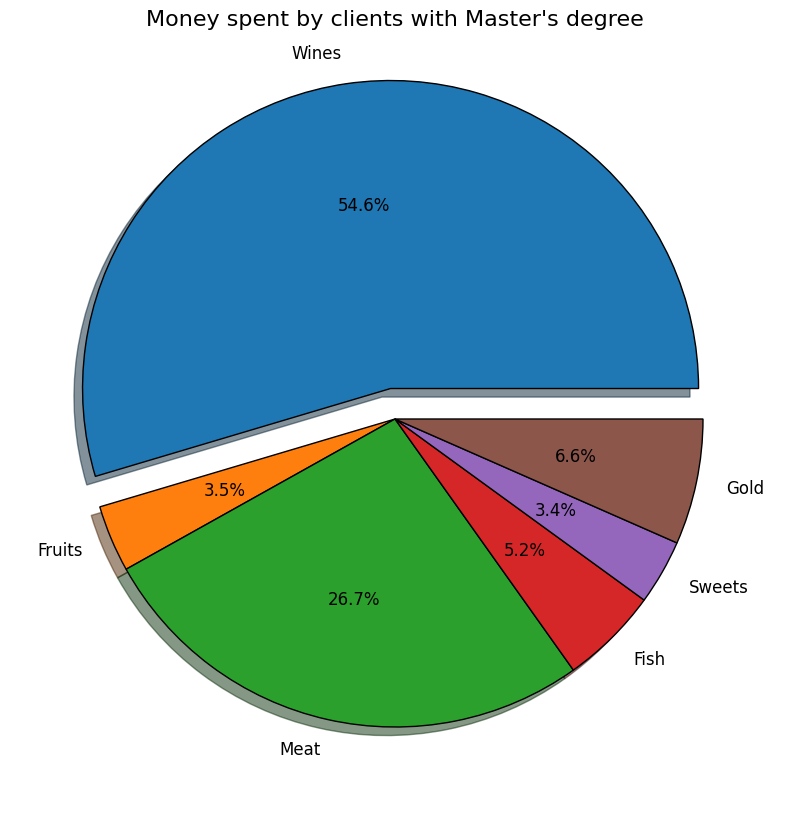

In [34]:
masters = data[data['Education'] == 'Master'] #keep only the people with master's degree
masters_spent = masters[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()  #sum the amount that they have spent on each product

plt.figure(figsize=(10,10))
labels = ['Wines' , 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
explode = (0.1,0,0,0,0,0)
wedgeprops = {'linewidth':1, 'edgecolor': 'black'}
plt.pie(masters_spent, labels=labels, autopct='%1.1f%%',  explode=explode, shadow=True, wedgeprops=wedgeprops, textprops={'fontsize': 12})
plt.title("Money spent by clients with Master's degree", fontsize=16)
plt.show()


# Question 7

## LabelEncoder

In [35]:
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_For',
                      'Age', 'Spent', 'Kids', 'Family_Size']

categorical_features = ['Education','Marital_Status','Living_With']

final_data = data[numerical_features + categorical_features].copy()

label_encoder_model = LabelEncoder()

for col in categorical_features:
  final_data[col] = label_encoder_model.fit_transform(final_data[col])


final_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Kids,Family_Size,Education,Marital_Status,Living_With
0,58138.0,0,0,58,635,88,546,172,88,88,...,4,7,3831,66,1617,0,1,2,2,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,5,3301,69,27,2,3,2,2,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,10,4,3512,58,776,0,2,2,3,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,4,6,3339,39,53,1,3,2,3,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,6,5,3293,42,422,1,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,4,5,3561,56,1341,1,3,2,1,1
2236,64014.0,2,1,56,406,0,30,0,0,8,...,5,7,3189,77,444,3,5,4,3,1
2237,56981.0,0,0,91,908,48,217,32,12,24,...,13,6,3290,42,1241,0,1,2,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,10,3,3374,67,843,1,3,3,3,1


## Scaling with StandardScaler

In [36]:
sc = StandardScaler()
scaled_data = sc.fit_transform(final_data)
scaled_data = pd.DataFrame(scaled_data, columns=final_data.columns)

scaled_data
#scaled_data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Kids,Family_Size,Education,Marital_Status,Living_With
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,...,-0.562650,0.689203,1.473748,1.017189,1.679323,-1.266589,-1.759012,-0.350162,0.253707,-1.347625
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,...,-1.179732,-0.139645,-1.127353,1.273530,-0.963897,1.403420,0.448513,-0.350162,0.253707,-1.347625
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,...,1.288596,-0.554069,-0.091820,0.333612,0.281242,-1.266589,-0.655250,-0.350162,1.195500,0.742046
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,...,-0.562650,0.274779,-0.940859,-1.289883,-0.920675,0.068415,0.448513,-0.350162,1.195500,0.742046
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,...,0.054432,-0.139645,-1.166615,-1.033542,-0.307248,0.068415,0.448513,1.432997,-0.688085,0.742046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,...,-0.562650,-0.139645,0.148659,0.162718,1.220500,0.068415,0.448513,-0.350162,-0.688085,0.742046
2201,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,...,-0.254109,0.689203,-1.677019,1.957107,-0.270675,2.738424,2.656038,1.432997,1.195500,0.742046
2202,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,...,2.214218,0.274779,-1.181338,-1.033542,1.054260,-1.266589,-1.759012,-0.350162,-1.629877,-1.347625
2203,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,...,1.288596,-0.968493,-0.769088,1.102636,0.392623,0.068415,0.448513,0.541417,1.195500,0.742046


## PCA

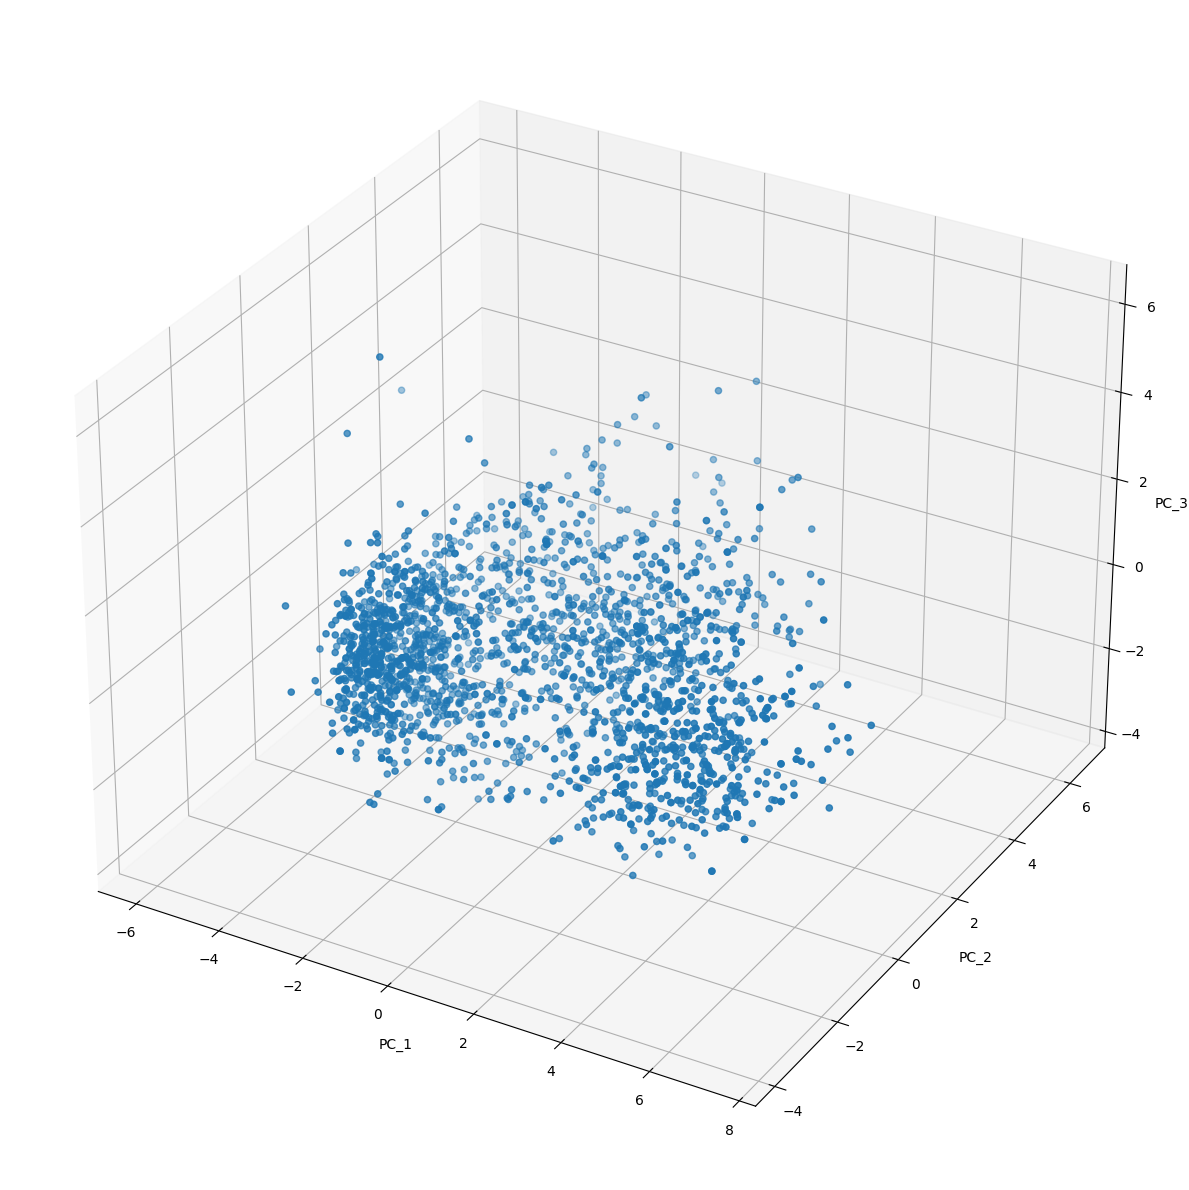

In [37]:
pca = PCA(n_components=3)

pc_components = pca.fit_transform(scaled_data)
pc_components_df = pd.DataFrame(pc_components, columns=['PC_1', 'PC_2', 'PC_3'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(pc_components_df['PC_1'], pc_components_df['PC_2'], pc_components_df['PC_3'])

ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

fig.tight_layout()
plt.show()

# Question 8


## Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of Squared Errors')

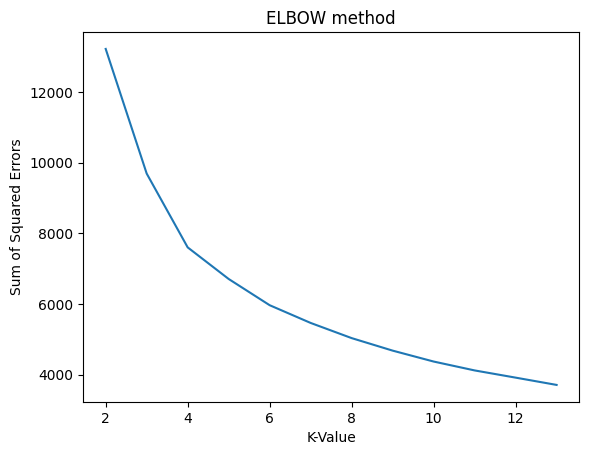

In [38]:
k = range(2, 14)
sum_squared_errors = []

for i in k:
  model = KMeans(n_clusters = i, random_state=10)
  model.fit(pc_components_df)
  sum_squared_errors.append(model.inertia_)

plt.plot(k, sum_squared_errors)
plt.title('ELBOW method')
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')

## KMeans & Scatter plot

In [39]:
model = KMeans(n_clusters=4, random_state=10)
pc_components_df['Cluster'] = model.fit_predict(pc_components_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


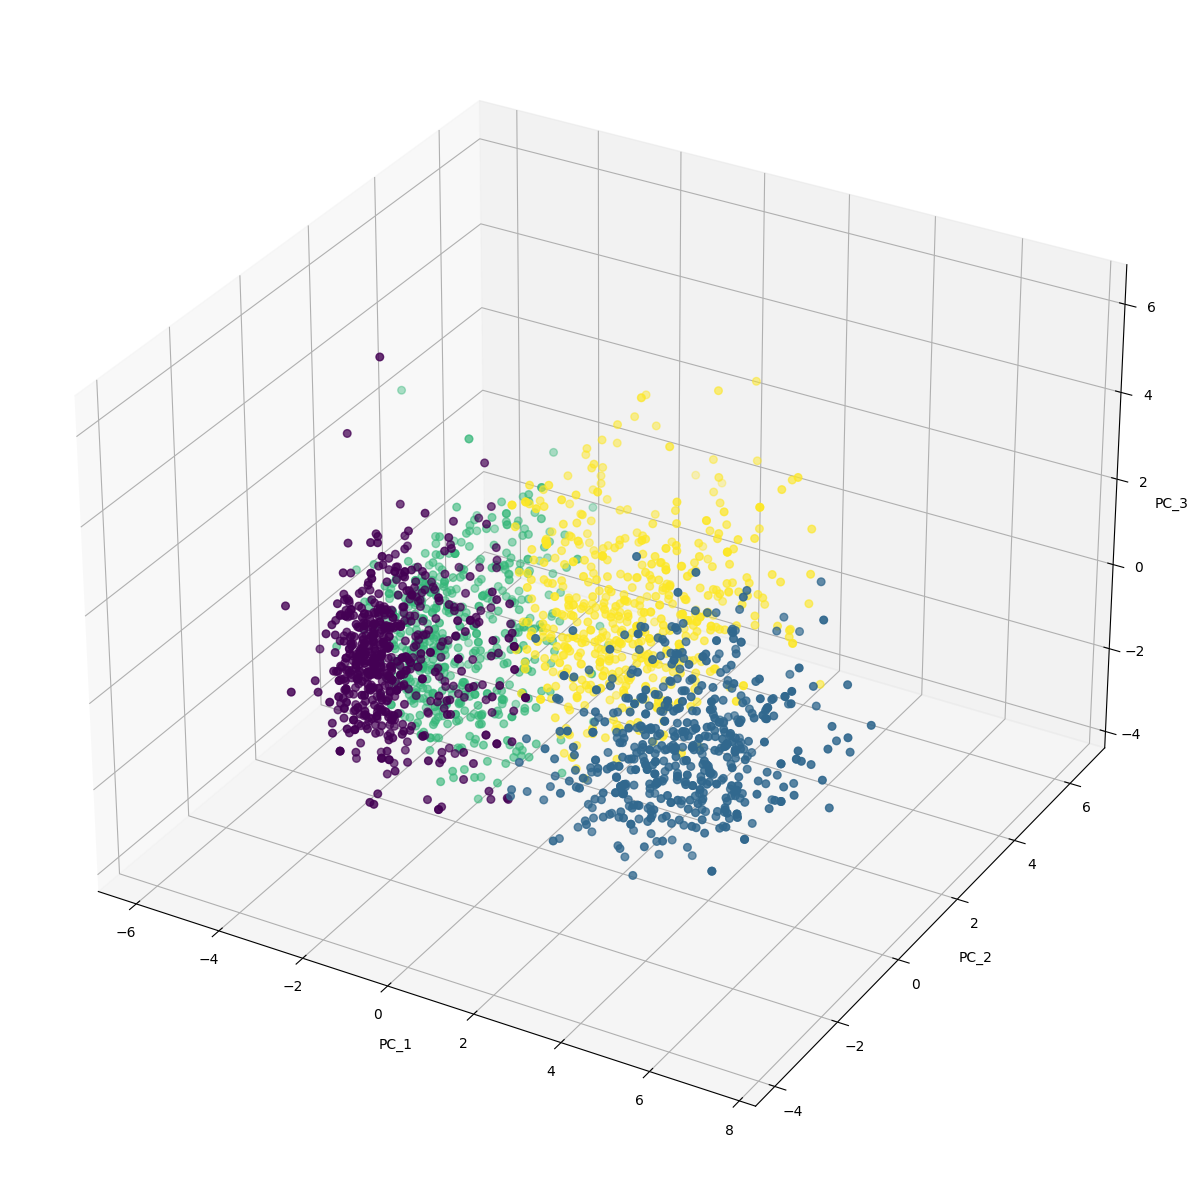

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(pc_components_df['PC_1'], pc_components_df['PC_2'], pc_components_df['PC_3'], c=pc_components_df['Cluster'], s=30)

ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

fig.tight_layout()
plt.show()

# Question 9

## Εξέταση του χαρακτηριστικού **Spent**

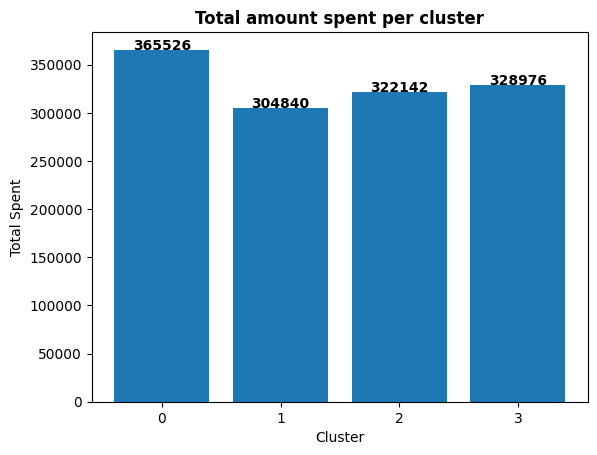

In [41]:
data['Cluster'] = pc_components_df['Cluster']

clusters_total_spent = data.groupby('Cluster')['Spent'].sum()
plt.bar(clusters_total_spent.index, clusters_total_spent.values)
plt.title("Total amount spent per cluster", weight='bold')
plt.xlabel("Cluster")
plt.ylabel("Total Spent")
plt.xticks(range(len(clusters_total_spent.index)), clusters_total_spent.index.astype(int))

for index, value in enumerate(clusters_total_spent):
  plt.text(index, value, str(value), horizontalalignment='center', fontweight='bold')
plt.show()


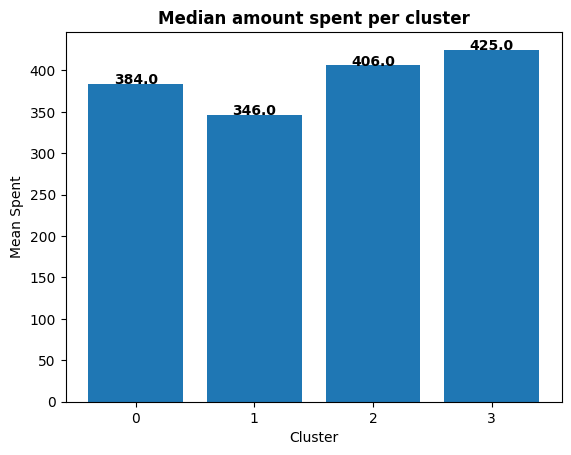

In [42]:
clusters_total_spent = data.groupby('Cluster')['Spent'].median()
plt.bar(clusters_total_spent.index, clusters_total_spent.values)
plt.title("Median amount spent per cluster", weight='bold')
plt.xlabel("Cluster")
plt.ylabel("Mean Spent")
plt.xticks(range(len(clusters_total_spent.index)), clusters_total_spent.index.astype(int))

for index, value in enumerate(clusters_total_spent):
  plt.text(index, value, str(value), horizontalalignment='center', fontweight='bold')
plt.show()

## Εξέταση του χαρακτηριστικού **Income**

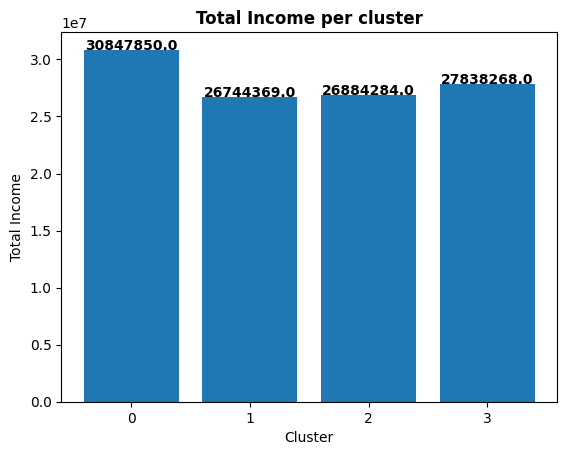

In [43]:
clusters_income = data.groupby('Cluster')['Income'].sum()
plt.bar(clusters_income.index, clusters_income.values)
plt.title("Total Income per cluster", weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Total Income')
plt.xticks(range(len(clusters_income.index)), clusters_income.index.astype(int))

for index, value in enumerate(clusters_income):
  plt.text(index, value, str(value), horizontalalignment='center', fontweight='bold')
plt.show()

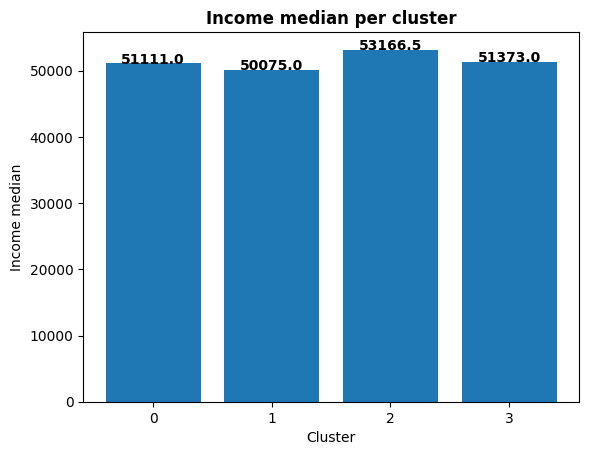

In [44]:
clusters_income = data.groupby('Cluster')['Income'].median()
plt.bar(clusters_income.index, clusters_income.values)
plt.title("Income median per cluster", weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Income median')
plt.xticks(range(len(clusters_income.index)), clusters_income.index.astype(int))

for index, value in enumerate(clusters_income):
  plt.text(index, value, str(value), horizontalalignment='center', fontweight='bold')
plt.show()

## Εξέταση του χαρακτηριστικού Age Group

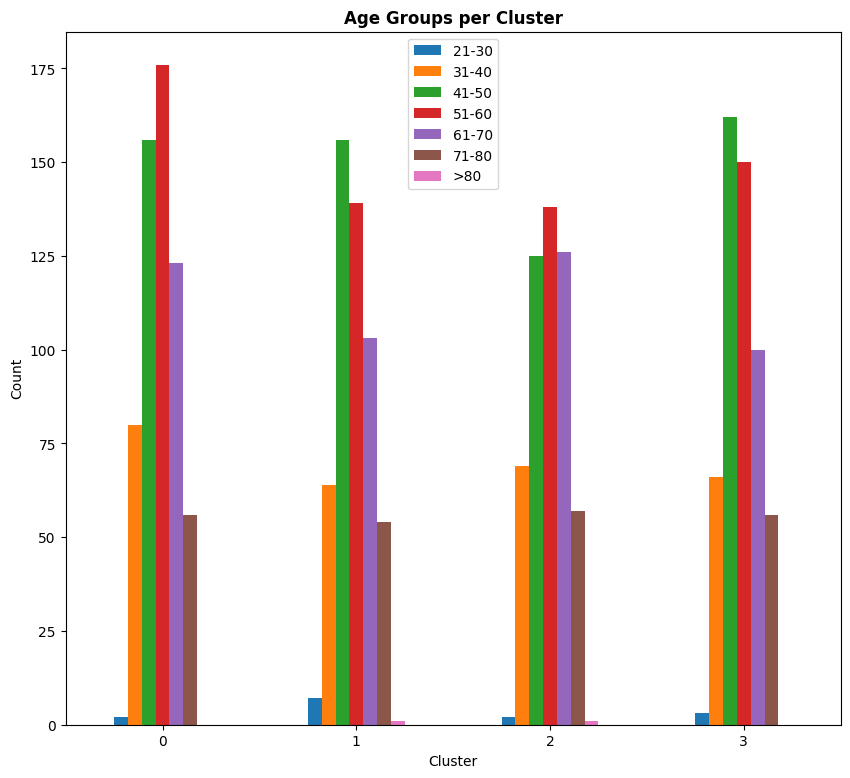

In [45]:
age_group_counts = data.groupby(['Cluster', 'Age_Group']).size().unstack()


fig, ax = plt.subplots(figsize=(10, 9))
age_group_counts.plot(kind='bar', ax=ax)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Age Groups per Cluster', weight='bold')
plt.legend(loc='upper center')
plt.xticks(range(len(age_group_counts.index)) ,age_group_counts.index.astype(int), rotation=0)
plt.show()


## Εξέταση του χαρακτηριστικού **Is_Parent**

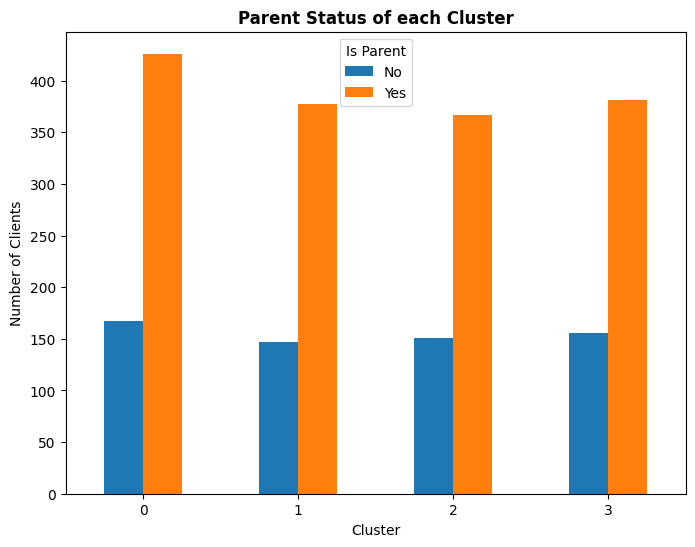

In [46]:
data['Is_Parent'] = np.where(data['Kids'] > 0, 1, 0) #δημιουργία μιας ακόμη στήλης που δείχνει εάν κάποιος είναι γονέας

grouped = data.groupby(['Cluster', 'Is_Parent']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(8, 6))
pivoted_grouped = grouped.pivot(index='Cluster', columns='Is_Parent', values='count')
pivoted_grouped.plot(kind='bar', ax=ax)
plt.xlabel('Cluster')
plt.ylabel('Number of Clients')
plt.title('Parent Status of each Cluster', weight='bold')
plt.legend(['No','Yes'], title='Is Parent', loc='upper center')

plt.xticks(range(len(pivoted_grouped.index)), pivoted_grouped.index.astype(int), rotation=0)
plt.show()


## Εξέταση των χαρακτηριστικών **NumWebPurchases** και **NumbStorePurchases**

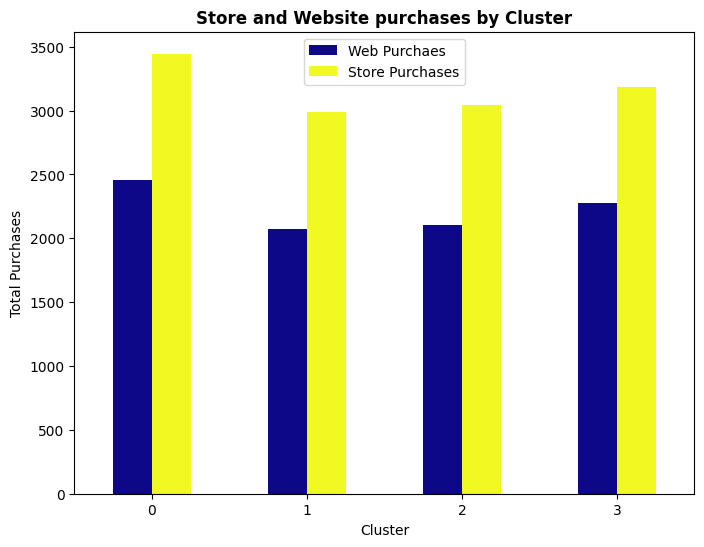

In [47]:
grouped_data = data.groupby(['Cluster'])[['NumWebPurchases', 'NumStorePurchases']].sum()
fig, ax = plt.subplots(figsize=(8,6))
grouped_data.plot(kind='bar', ax=ax, cmap='plasma')
plt.title('Store and Website purchases by Cluster', weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Total Purchases')
plt.xticks(range(len(grouped_data.index)), grouped_data.index.astype(int), rotation=0)
plt.legend(['Web Purchaes', 'Store Purchases'], loc='upper center')
plt.show()

In [50]:
clusters =  data.groupby('Cluster').count()['ID']
print(clusters)

Cluster
0.0    593
1.0    524
2.0    518
3.0    537
Name: ID, dtype: int64


## Συμπεράσματα
Παρατηρούμε ότι: 

*   Οι πελάτες που ανήκουν στο cluster 0 μπορεί αθροιστικά να έχουν ξοδέψει τα 
περισσότερα χρήματα, η διαμέσος όμως είναι αρκετά χαμηλά. Υπάρχουν πελάτες με πολύ υψηλά εισοδήματα, σε γενικές γραμμές όμως το εισόδημά τους δεν είναι το υψηλότερο. Η επικρατέστερη ηλικιακή τους ομάδα είναι 51-60 και η μεγάλη πλειοψηφία τους έχει παιδιά.


*   Οι πελάτες που ανήκουν στο cluster 1 είναι αυτοί που έχουν τα χαμηλότερα εισοδήματα, και ξοδεύουν τα λιγότερα χρήματα. Η επικρατέστερη ηλικιακή ομάδα είναι 41-50.

*   Οι πελάτες που ανήκουν στο cluster 2, έχουν το μεγαλύτερο μέσο εισόδημα, όμως ξοδεύουν λιγότερα από το cluster 3. Οι ηλικίες τους έχουν τη μικρότερη διασπορά, και επίσης εδώ βρίσκεται το μεγαλύτερο ποσοστό ηλικιών > 60, συγκριτικά με τις νεότερες ηλικίες στο ίδιο cluster. Οι πελάτες με παιδιά εδώ δεν είναι τόσο περισσότεροι από αυτούς που δεν έχουν παιδιά, όσο είναι στα άλλα clusters.

*   Οι πελάτες που ανήκουν στο cluster 3 μπορεί να έχουν ξοδέψει συνολικά λιγότερα από τους πελάτες του cluster 0, όμως η διάμεσος των αγορών είναι η μεγαλύτερη. Μάλιστα, ξοδεύουν περισσότερο από το cluster 2 παρόλο που τα εισοδήματά τους είναι μικρότερα. Οι ηλικίες 41-60 είναι με διαφορά οι επικρατέστερες.


Σημείωση: Ο λόγος που το άθροισμα (sum) δίνει διαφορετικά δεδομένα από την διάμεσο (median) είναι γιατί τα clusters δεν έχουν ίσο αριθμό πελατών το καθένα, κι έτσι για παράδειγμα στο cluster 0 που υπάρχουν περισσότεροι πελάτες, το άθροισμα του εισοδήματος δεν είναι μια καλή μετρική για να βγει οποιοδήποτε συμπέρασμα για το εισόδημα των πελατών.



In [54]:
counts = data.groupby('Cluster').size()
counts

Cluster
0.0    593
1.0    524
2.0    518
3.0    537
dtype: int64